In [1]:
import pandas as pd
import datetime as dt
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [18]:
p1 ="https://api.covid19india.org/csv/latest/state_wise.csv"
m = pd.read_csv(p1)
df2 = m[1:]
df2

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
1,Maharashtra,1947011,1847361,49695,48801,04/01/2021 21:55:38,1154,MH,4875,10362,29,"[Dec 16]:10,218 duplicate cases & other state ..."
2,Karnataka,922538,900202,12110,10207,04/01/2021 22:56:36,19,KA,600,1283,3,NaN
3,Andhra Pradesh,883210,873149,7118,2943,04/01/2021 20:06:39,0,AP,128,252,3,NaN
4,Tamil Nadu,821550,801414,12166,7970,04/01/2021 20:33:40,0,TN,838,985,10,[July 22]: 444 backdated deceased entries adde...
5,Kerala,778874,712389,3161,63131,04/01/2021 18:31:45,193,KL,3021,5145,19,Mahe native who expired in Kannur included in ...
6,Delhi,627256,611970,10597,4689,04/01/2021 18:31:47,0,DL,384,727,12,[July 14]: Value for the total tests conducted...
7,Uttar Pradesh,588882,567964,8413,12505,04/01/2021 22:56:40,0,UP,711,1054,10,[Jan 1]:As no bulletin was provided for 31'st ...
8,West Bengal,555572,536084,9817,9671,04/01/2021 20:51:35,0,WB,597,1347,25,NaN
9,Odisha,330492,326507,1938,2047,04/01/2021 21:55:44,0,OR,183,298,2,[July 12th] :20 non-covid deaths reported in s...
10,Rajasthan,310278,299375,2714,8189,04/01/2021 20:33:50,0,RJ,457,755,4,NaN


(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000., 2250000.]),
 <a list of 10 Text major ticklabel objects>)

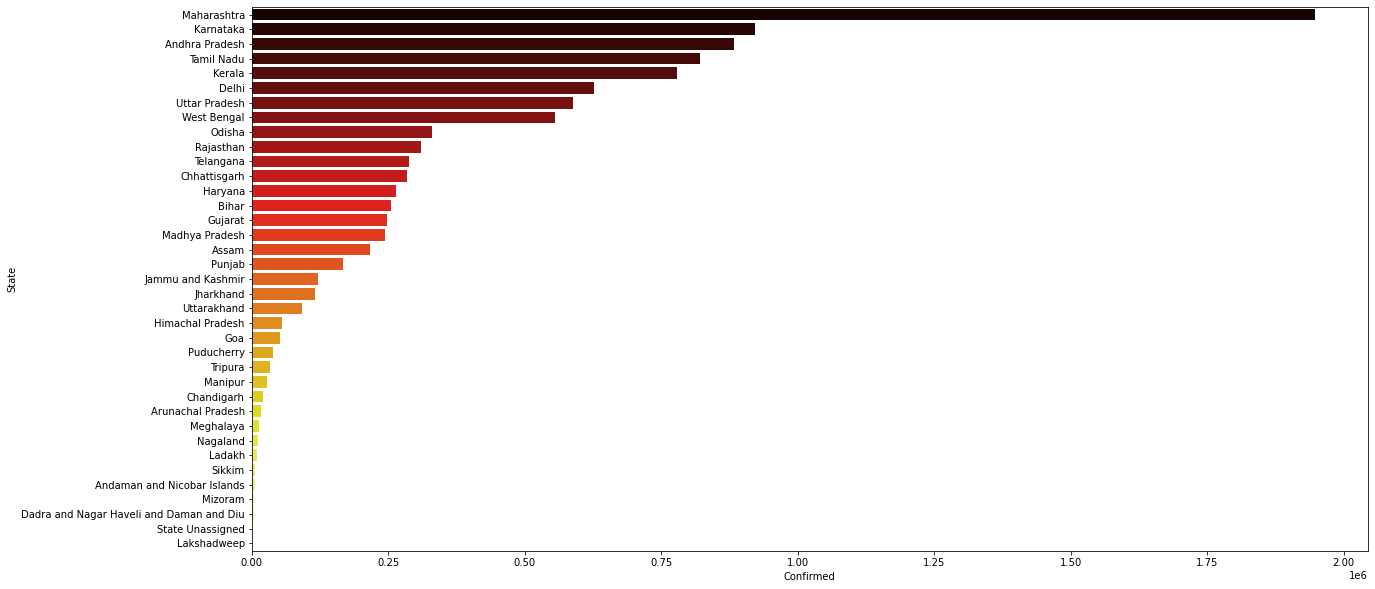

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(y='State',x='Confirmed',data=df2, palette="hot")
plt.xticks(rotation = 0)


In [ ]:
# path = r"census.csv"
# df = pd.read_csv(path)
# df

In [ ]:
# df['update pop'] = (df['Population'] * 11.2/100) + df['Population']
# df['50% for herd immunity'] = df['update pop']/2
# df

In [ ]:
# a2 = pd.DataFrame()
# for i in range(len(df)):
#     if df.iloc[i]['State'] == 'Andhra Pradesh':
#         a2 = a2.append(df.iloc[i])

# print(len(a2))
# a2

In [2]:
data1 = pd.read_csv("https://api.covid19india.org/csv/latest/districts.csv")
data1

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested
0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0,0,2679.0
1,2020-04-26,Andhra Pradesh,Anantapur,53,14,4,0,NaN
2,2020-04-26,Andhra Pradesh,Chittoor,73,13,0,0,NaN
3,2020-04-26,Andhra Pradesh,East Godavari,39,12,0,0,NaN
4,2020-04-26,Andhra Pradesh,Guntur,214,29,8,0,NaN
...,...,...,...,...,...,...,...,...
160988,2021-01-04,West Bengal,Purba Bardhaman,12354,12068,95,0,NaN
160989,2021-01-04,West Bengal,Purba Medinipur,20231,19484,275,0,NaN
160990,2021-01-04,West Bengal,Purulia,6990,6716,47,0,NaN
160991,2021-01-04,West Bengal,South 24 Parganas,36205,35438,687,0,NaN


In [20]:
data1['State'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Himachal Pradesh',
       'Haryana', 'Jharkhand', 'Jammu and Kashmir', 'Karnataka', 'Kerala',
       'Ladakh', 'Maharashtra', 'Meghalaya', 'Manipur', 'Madhya Pradesh',
       'Mizoram', 'Odisha', 'Punjab', 'Puducherry', 'Rajasthan',
       'Telangana', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Sikkim',
       'Dadra and Nagar Haveli and Daman and Diu', 'Nagaland'],
      dtype=object)

In [ ]:
a1 = pd.DataFrame()
for i in range(len(data1)):
    if data1.iloc[i]['State'] == 'Andhra Pradesh':
        a1 = a1.append(data1.iloc[i])


In [ ]:
s = a1['District'].unique()

In [ ]:
m = a1.tail(len(s)-1)
m

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'District', y = m['Confirmed'],data=a1, palette = 'rocket')

In [ ]:
b1 = pd.DataFrame()
for i in range(len(a1)):
    if a1.iloc[i]['District'] == 'East Godavari':
        b1 = b1.append(a1.iloc[i])
b1

In [ ]:
b1['daily increase'] = b1['Confirmed'].diff()
b1['daily recovery'] = b1['Recovered'].diff()
b1.fillna(0)

In [ ]:
plt.figure(figsize = (30,10))
sns.lineplot(x = b1['Date'], y = b1['daily increase'], color = 'red', marker = "o",label = 'Daily Confirmed Increase', lw = 0.7)
sns.lineplot(x = b1['Date'], y = b1['daily recovery'], color = 'black', marker = "o", label = 'Daily Recovery', lw = 0.7)
plt.xticks(range(0,252, 15))
plt.ylabel('Comparison')
plt.legend(loc ='upper left', prop={'size': 20})

In [ ]:
plt.figure(figsize = (15,5))
sns.lineplot(x = b1['Date'], y = b1['Confirmed'], color = 'k', label = 'Confirmed')
sns.lineplot(x = b1['Date'], y = b1['Tested'], color = 'b', label = 'Tested')
sns.lineplot(x = b1['Date'], y = b1['Recovered'], color = 'red', label = 'Recovery')
plt.xticks(range(0,252, 15), rotation = 45)
plt.ylabel('Comparison')
plt.legend(loc ='upper left', prop={'size': 20})

FUNCTION FOR STATES


Gujarat


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

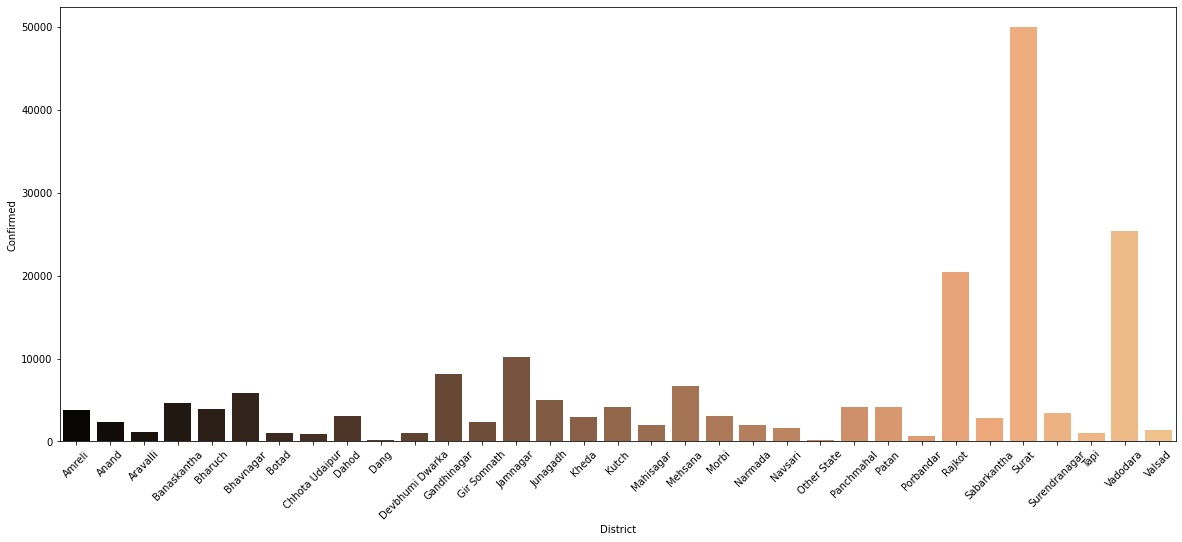

In [14]:
def function1(state):
    global t
    global df
    df = pd.DataFrame()
    for i in range(len(data1)):
        if data1.iloc[i]['State'] == state:
            df = df.append(data1.iloc[i])
    s = df['District'].unique()
    t = df.tail(len(s)-1)
    return t
        
   

state = input()
function1(state)

plt.figure(figsize = (20,8))
sns.barplot(x = 'District', y = 'Confirmed', data = t , palette = 'copper')
plt.xticks(rotation = 45)

FUNCTION FOR DISTRICTS


Surat


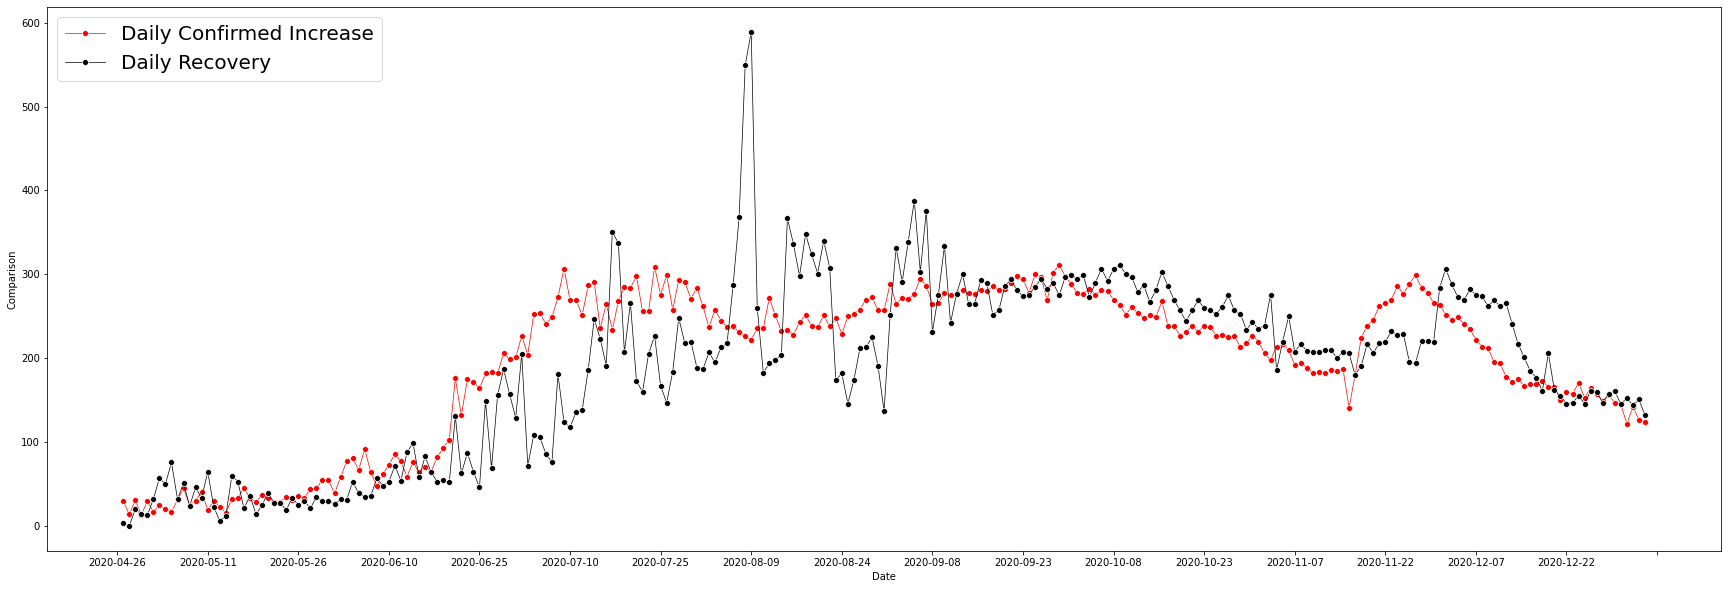

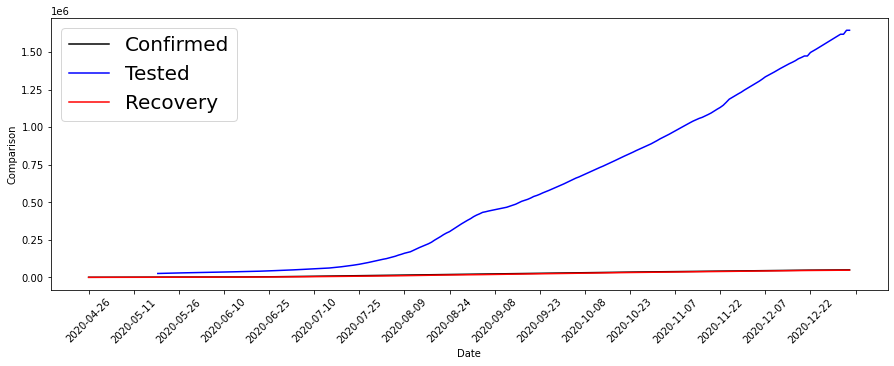

In [16]:
def function2(district):
    global b
    b = pd.DataFrame()
    for i in range(len(df)):
        if df.iloc[i]['District'] == district:
            b = b.append(df.iloc[i])
    b['daily increase'] = b['Confirmed'].diff()
    b['daily recovery'] = b['Recovered'].diff()
    b.fillna(0)
    return b

district = input()
function2(district)
# b['daily increase'] = b['Confirmed'].diff()
# b['daily recovery'] = b['Recovered'].diff()
# b.fillna(0)

plt.figure(figsize = (30,10))
sns.lineplot(x = b['Date'], y = b['daily increase'], color = 'red', marker = "o",label = 'Daily Confirmed Increase', lw = 0.7)
sns.lineplot(x = b['Date'], y = b['daily recovery'], color = 'black', marker = "o", label = 'Daily Recovery', lw = 0.7)
plt.xticks(range(0,260, 15))
plt.ylabel('Comparison')
plt.legend(loc ='upper left', prop={'size': 20})
plt.show()
plt.figure(figsize = (15,5))
sns.lineplot(x = b['Date'], y = b['Confirmed'], color = 'k', label = 'Confirmed')
sns.lineplot(x = b['Date'], y = b['Tested'], color = 'b', label = 'Tested')
sns.lineplot(x = b['Date'], y = b['Recovered'], color = 'red', label = 'Recovery')
plt.xticks(range(0,260, 15), rotation = 45)
plt.ylabel('Comparison')
plt.legend(loc ='upper left', prop={'size': 20})
plt.show()